# **Penting**
- Pastikan seluruh kriteria memiliki output yang sesuai, karena jika tidak ada output dianggap tidak selesai.
- Misal, Anda menggunakan df = df.dropna() silakan gunakan df.isnull().sum() sebagai tanda sudah berhasil. Silakan sesuaikan seluruh output dengan perintah yang sudah disediakan.
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Pastikan Anda menggunakan variabel df dari awal sampai akhir dan tidak diperbolehkan mengganti nama variabel tersebut.
- Hapus simbol pagar (#) pada kode yang bertipe komentar jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan
- Pastikan Anda mengerjakan sesuai section yang sudah diberikan tanpa mengubah judul atau header yang disediakan.

# **INFORMASI DATASET**
## Latar Belakang

Dataset ini berisi informasi transaksi perbankan yang mencakup berbagai atribut penting seperti ID transaksi, ID akun, jumlah transaksi, waktu transaksi, jenis transaksi (Debit/Kredit), lokasi, perangkat yang digunakan, alamat IP, ID merchant, saluran transaksi (ATM/Online), usia dan pekerjaan nasabah, durasi transaksi, jumlah upaya login, saldo akun, serta tanggal transaksi sebelumnya. Data ini merepresentasikan aktivitas finansial harian dari berbagai profil pengguna dengan karakteristik perilaku yang beragam. Dengan memanfaatkan atribut-atribut tersebut, kita dapat mengeksplorasi pola-pola tersembunyi dalam perilaku transaksi nasabah, misalnya dalam mendeteksi potensi kecurangan, mengidentifikasi kelompok pengguna berdasarkan kebiasaan transaksi, serta membangun model prediktif untuk klasifikasi jenis perilaku transaksi. Pendekatan ini sangat relevan dalam konteks pengelolaan risiko perbankan dan pengembangan sistem keamanan berbasis data.

Dengan menerapkan metode **unsupervised learning**, khususnya **clustering**, proyek ini bertujuan untuk membentuk segmentasi pelanggan yang merepresentasikan pola-pola pembelian yang serupa. Hasil segmentasi ini diharapkan dapat memberikan insight yang bernilai bagi pihak manajemen, khususnya dalam menyusun strategi promosi yang lebih tepat sasaran, mengembangkan program loyalitas, serta mengoptimalkan layanan pelanggan.

# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import PCA
import joblib

# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 5 baris pertama dengan function `head`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

In [70]:
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)

In [71]:
# Tampilkan 5 baris pertama dengan function head.
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 08:06:39


In [72]:
# Tinjau jumlah baris kolom dan jenis data dalam dataset dengan info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

In [73]:
# Menampilkan statistik deskriptif dataset dengan menjalankan describe
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2511.000000,2519.000000,2511.000000,2516.000000,2510.000000
mean,297.656468,44.678444,119.422939,1.121622,5113.438124
std,292.230367,17.837359,70.078513,0.594469,3897.975861
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.310000,27.000000,63.000000,1.000000,1504.727500
50%,211.360000,45.000000,112.000000,1.000000,4734.110000
75%,413.105000,59.000000,161.000000,1.000000,7672.687500
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

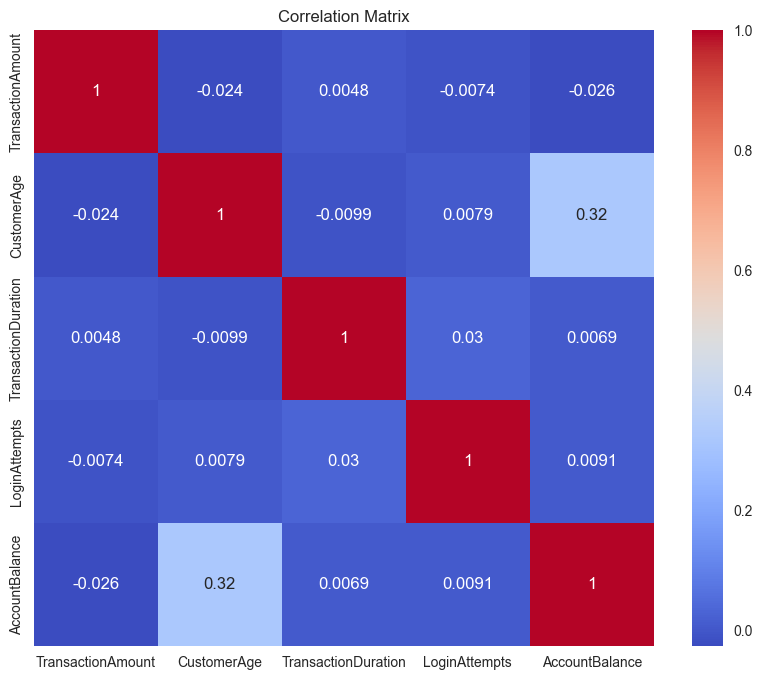

In [74]:
# Menampilkan korelasi antar fitur (Opsional Skilled 1)
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

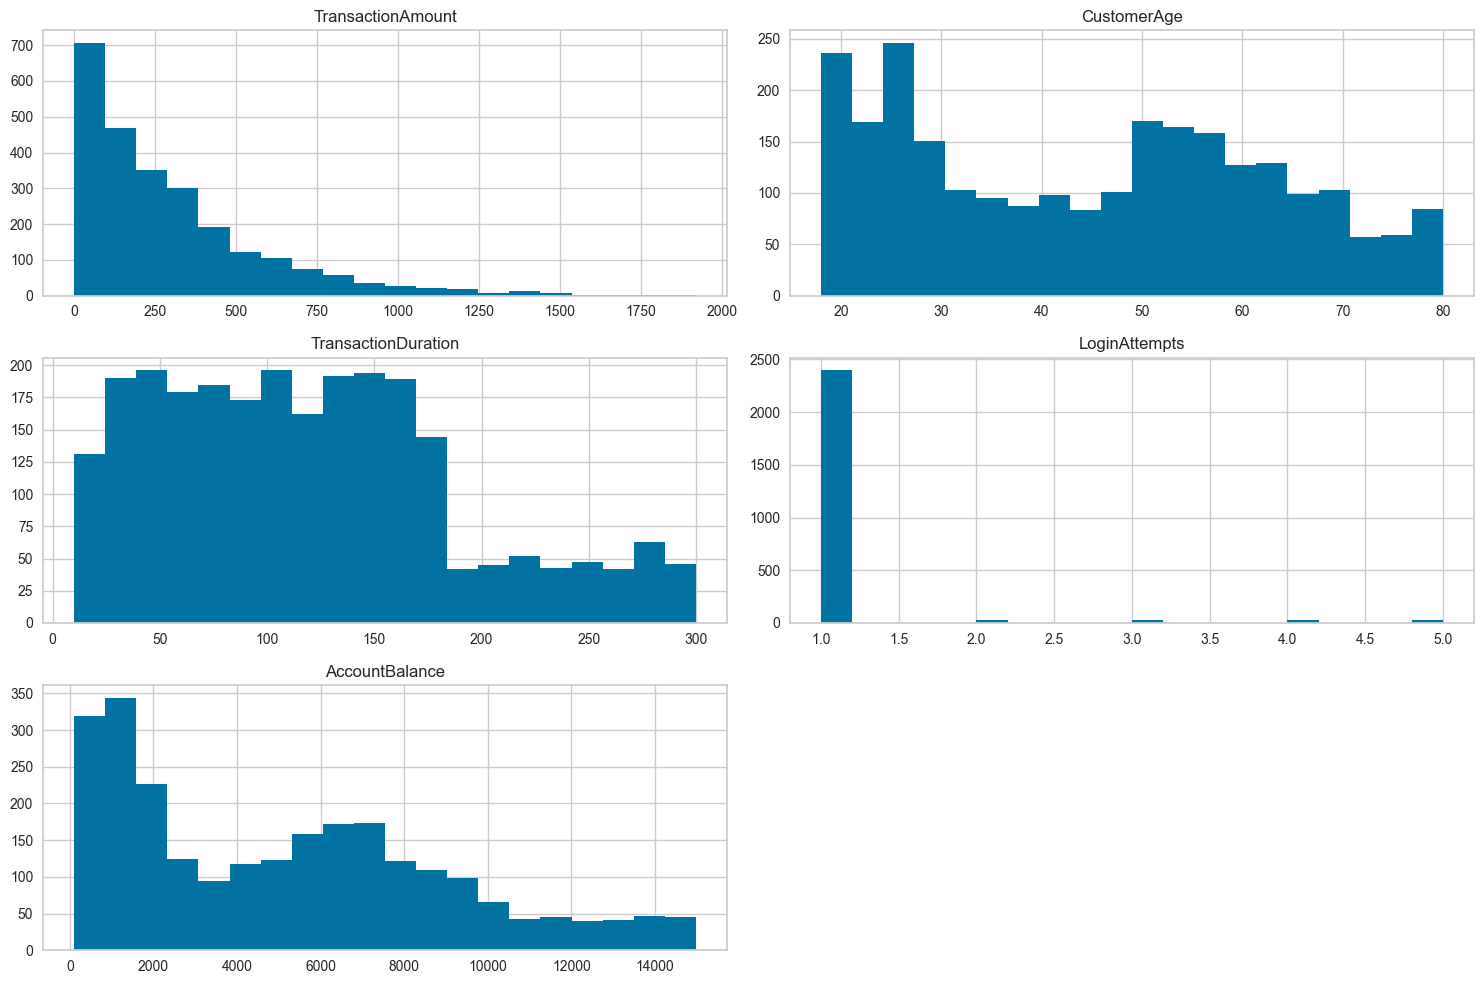

In [75]:
# Menampilkan histogram untuk semua kolom numerik (Opsional Skilled 1)
df.hist(figsize=(15, 10), bins=20)
plt.tight_layout()
plt.show()

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [76]:
# Visualisasi yang lebih informatif (Opsional Advanced 1)

# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [77]:
# Mengecek dataset menggunakan isnull().sum()
df.isnull().sum()

TransactionID              29
AccountID                  21
TransactionAmount          26
TransactionDate            28
TransactionType            30
Location                   30
DeviceID                   30
IP Address                 20
MerchantID                 23
Channel                    27
CustomerAge                18
CustomerOccupation         23
TransactionDuration        26
LoginAttempts              21
AccountBalance             27
PreviousTransactionDate    24
dtype: int64

In [78]:
# Mengecek dataset menggunakan duplicated().sum()
df.duplicated().sum()

21

In [79]:
# Melakukan feature scaling menggunakan MinMaxScaler() atau StandardScalar() untuk fitur numerik.
# Pastikan kamu menggunakan function head setelah melalukan scaling.
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
df.head()


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,0.007207,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,0.838710,Doctor,0.244828,0.0,0.336832,2024-11-04 08:08:08
1,TX000002,AC00455,0.195940,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,0.806452,Doctor,0.451724,0.0,0.918055,2024-11-04 08:09:35
2,TX000003,AC00019,0.065680,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,0.016129,Student,0.158621,0.0,0.068637,2024-11-04 08:07:04
3,TX000004,AC00070,0.096016,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,0.129032,Student,0.051724,0.0,0.569198,2024-11-04 08:09:06
4,TX000005,AC00411,0.006874,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,0.648276,0.0,0.492591,2024-11-04 08:06:39


In [80]:
# Melakukan drop pada kolom yang memiliki keterangan id dan IP Address
cols_to_drop = [col for col in df.columns if 'id' in col.lower() or 'ip address' in col.lower()]
df.drop(columns=cols_to_drop, inplace=True)

In [81]:
# Melakukan feature encoding menggunakan LabelEncoder() untuk fitur kategorikal.
# Pastikan kamu menggunakan function head setelah melalukan encoding.
categorical_cols = df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])
df.head()


,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,0.007207,680,1,36,0,0.838710,0,0.244828,0.0,0.336832,105
1,0.195940,1178,1,15,0,0.806452,0,0.451724,0.0,0.918055,192
2,0.065680,1262,1,23,2,0.016129,3,0.158621,0.0,0.068637,41
3,0.096016,818,1,33,2,0.129032,3,0.051724,0.0,0.569198,163
4,0.006874,1939,0,1,2,NaN,3,0.648276,0.0,0.492591,16


In [82]:
# Last checking gunakan columns.tolist() untuk checking seluruh fitur yang ada.
# Perbaiki kode di bawah ini tanpa menambahkan atau mengurangi cell code ini.
df.columns.tolist()

['TransactionAmount',
 'TransactionDate',
 'TransactionType',
 'Location',
 'Channel',
 'CustomerAge',
 'CustomerOccupation',
 'TransactionDuration',
 'LoginAttempts',
 'AccountBalance',
 'PreviousTransactionDate']

(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [83]:
# Menangani data yang hilang (bisa menggunakan dropna() atau metode imputasi fillna()).
df.fillna(df.median(numeric_only=True), inplace=True)

In [84]:
# Menghapus data duplikat menggunakan drop_duplicates().
df.drop_duplicates(inplace=True)

(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [85]:
# Melakukan Handling Outlier Data berdasarkan jumlah outlier, apakah menggunakan metode drop atau mengisi nilai tersebut.
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

In [86]:
# Melakukan binning data berdasarkan kondisi rentang nilai pada fitur numerik,
# lakukan pada satu sampai dua fitur numerik.
# Silahkan lakukan encode hasil binning tersebut menggunakan LabelEncoder.
# Pastikan kamu mengerjakan tahapan ini pada satu cell.
df['income_bin'] = pd.cut(df[numerical_cols[0]], bins=3, labels=['low', 'medium', 'high'])
df['income_bin'] = le.fit_transform(df['income_bin'])

# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Pastikan Anda menggunakan dataframe yang sudah melalui processing sesuai dengan levelnya (Basic, Skilled, Advanced)
2. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
3. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
4. Jalankan cell code `joblib.dump(model_kmeans, "model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [87]:
# Gunakan describe untuk memastikan proses clustering menggunakan dataset hasil preprocessing
# Lengkapi kode ini dengan mengubah nama DataFrame yang akan dilatih.
# Kode harus digunakan dan dilarang menambahkan syntax lainnya pada cell ini.
df.describe()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,income_bin
count,2514.000000,2514.000000,2514.000000,2514.000000,2514.00000,2514.000000,2514.000000,2514.000000,2514.0,2514.000000,2514.000000,2514.000000
mean,0.147655,1256.328958,0.787987,21.284010,1.01074,0.429415,1.530231,0.377490,0.0,0.336864,180.889021,1.100636
std,0.130069,725.581982,0.437042,12.397534,0.83084,0.286157,1.150477,0.240156,0.0,0.260683,103.956287,0.601609
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,0.043213,628.250000,1.000000,11.000000,0.00000,0.145161,0.250000,0.182759,0.0,0.095324,91.250000,1.000000
50%,0.110014,1256.500000,1.000000,21.000000,1.00000,0.435484,2.000000,0.351724,0.0,0.311416,181.000000,1.000000
75%,0.213328,1884.750000,1.000000,32.000000,2.00000,0.661290,3.000000,0.520690,0.0,0.506870,272.000000,1.000000
max,0.468501,2485.000000,2.000000,43.000000,3.00000,1.000000,4.000000,1.000000,0.0,1.000000,360.000000,2.000000


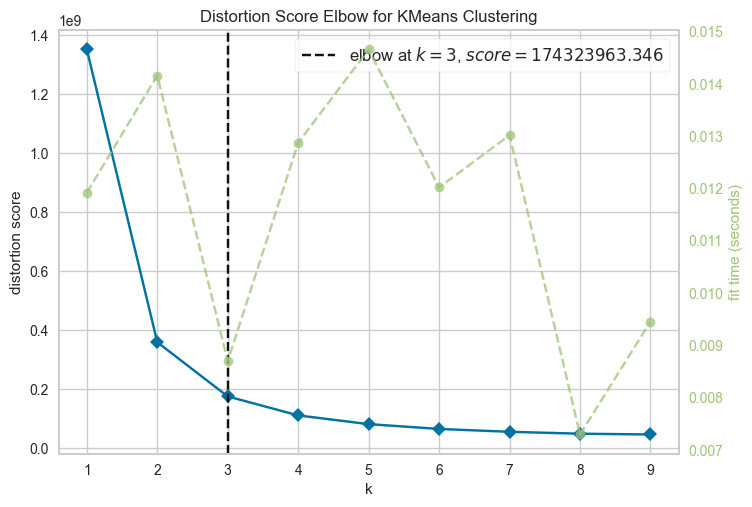

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [88]:
# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(df)
visualizer.show()

In [89]:
# Menggunakan algoritma K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df)
df['Target'] = kmeans.labels_

Jalankan cell code ini untuk menyimpan model kamu.

In [90]:
# Menyimpan model menggunakan joblib
joblib.dump(kmeans, "model_clustering.h5")

['model_clustering.h5']

(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [91]:
# Menghitung dan menampilkan nilai Silhouette Score.
silhouette_avg = silhouette_score(df.drop(columns=['Target']), df['Target'])
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.5406640892479891


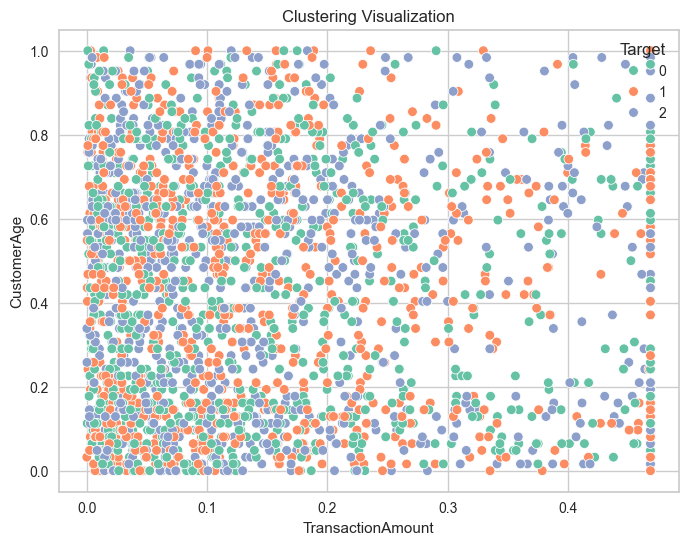

In [92]:
# Membuat visualisasi hasil clustering
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df[numerical_cols[0]], y=df[numerical_cols[1]], hue=df['Target'], palette='Set2')
plt.title('Clustering Visualization')
plt.show()

(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [93]:
# Membangun model menggunakan PCA.
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df.drop(columns='Target'))
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])
df_pca['Target'] = df['Target']

In [94]:
print(df_pca.isnull().sum())

PC1       0
PC2       0
Target    2
dtype: int64


In [95]:
df_pca = df_pca.fillna(df_pca.mean())

In [96]:
# Melatih model KMeans dengan dataset hasil PCA
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df_pca)

# Menambahkan hasil label clustering ke dalam DataFrame df_pca
df_pca['Target'] = kmeans.labels_

In [97]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")
joblib.dump(kmeans, "PCA_model_clustering.h5")

['PCA_model_clustering.h5']

In [98]:
# Menghitung silhouette score untuk model PCA
silhouette_avg = silhouette_score(df_pca, df_pca['Target'])  # Menggunakan kolom 'Target' sebagai label cluster
print("Silhouette Score:", silhouette_avg)


Silhouette Score: 0.5413912070117998


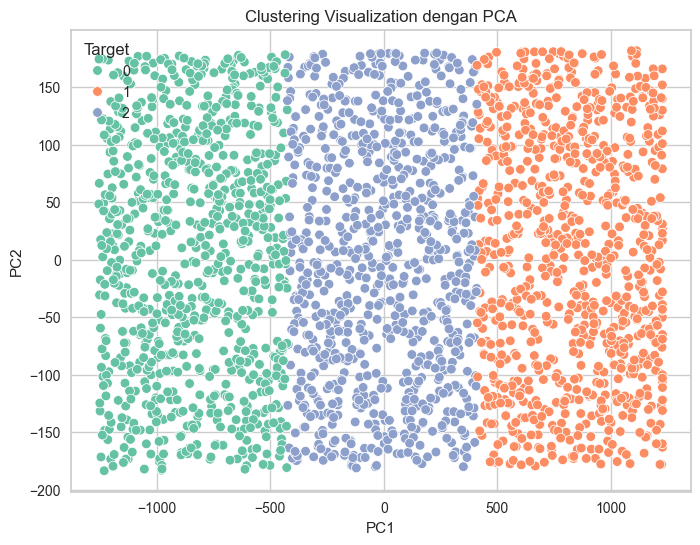

In [99]:
# Visualisasi hasil clustering PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pca['PC1'], y=df_pca['PC2'], hue=df_pca['Target'], palette='Set2')
plt.title('Clustering Visualization dengan PCA')
plt.show()


# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.


In [100]:
# Melakukan grup berdasarkan kolom 'Target' dan menghitung agregasi (mean, min, max)
grouped_pca = df_pca.groupby('Target')[['PC1', 'PC2']].agg(['mean', 'min', 'max'])

In [101]:
print(grouped_pca)

               PC1                                 PC2                        
              mean          min          max      mean         min         max
Target                                                                        
0      -840.834903 -1256.438777  -425.618939  1.735807 -183.602670  178.121993
1       833.660549   411.299768  1229.037910  1.930485 -179.471033  181.594566
2        -6.820796  -424.636626   410.371423 -3.681079 -181.220170  179.700936


In [102]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.
df.groupby('Target')[numerical_cols].agg(['mean', 'min', 'max'])

TransactionAmount                     CustomerAge            \
                    mean       min       max        mean  min  max   
Target                                                               
0               0.143884  0.000313  0.468501    0.412942  0.0  1.0   
1               0.149037  0.000000  0.468501    0.428560  0.0  1.0   
2               0.150026  0.000031  0.468501    0.446686  0.0  1.0   

       TransactionDuration                LoginAttempts            \
                      mean  min       max          mean  min  max   
Target                                                              
0                 0.367772  0.0  0.996552           0.0  0.0  0.0   
1                 0.382640  0.0  1.000000           0.0  0.0  0.0   
2                 0.382006  0.0  0.996552           0.0  0.0  0.0   

       AccountBalance                      
                 mean       min       max  
Target                                     
0            0.334701  0.000064  0.997633  
1            0.344133  0.000000  1.000000  
2            0.331724  0.001125  0.997144

In [103]:
# Kembalikan kolom numerik ke skala asli
df[numerical_cols] = scaler.inverse_transform(df[numerical_cols])

In [104]:
df.groupby('Target')[numerical_cols].agg(['mean', 'min', 'max'])

TransactionAmount                 CustomerAge              \
                    mean   min       max        mean   min   max   
Target                                                             
0             276.351946  0.86  899.2425   43.602395  18.0  80.0   
1             286.239997  0.26  899.2425   44.570749  18.0  80.0   
2             288.137303  0.32  899.2425   45.694511  18.0  80.0   

       TransactionDuration              LoginAttempts            \
                      mean   min    max          mean  min  max   
Target                                                            
0               116.653892  10.0  299.0           1.0  1.0  1.0   
1               120.965517  10.0  300.0           1.0  1.0  1.0   
2               120.781623  10.0  299.0           1.0  1.0  1.0   

       AccountBalance                    
                 mean     min       max  
Target                                   
0         5080.513545  102.20  14942.78  
1         5220.823294  101.25  14977.99  
2         5036.217983  117.98  14935.50

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya.
*data-data diatas sudah dikembalikan ke nilai asli untuk Interpretasi
1. **Cluster 0**:
  - **Rata-rata (mean) Transaction Amount**: 276.35
  - **Rata-rata (mean) Customer Age**: 43.60
  - **Rata-rata (mean) Transaction Duration**: 116.65
  - **Rata-rata (mean) Login Attempts**: 1.0
  - **Rata-rata (mean) Account Balance**: 5080.51

- **Analisis:** Cluster ini mencakup jumlah transaksi yang rendah dan saldo akun yang relatif kecil. Mereka memiliki usia rata-rata sekitar 45 tahun, yang menunjukkan bahwa mereka mungkin berada pada fase kehidupan keuangan yang stabil, tetapi tidak terlalu aktif dalam melakukan transaksi. Durasi transaksi mereka cukup panjang, tetapi jumlah percobaan login mereka sangat rendah, mengindikasikan bahwa mereka jarang mengakses akun mereka.

2. **Cluster 1**:
  - **Rata-rata (mean) Transaction Amount**: 286.24
  - **Rata-rata (mean) Customer Age**: 44.57
  - **Rata-rata (mean) Transaction Duration**: 120.96
  - **Rata-rata (mean) Login Attempts**: 1.0
  - **Rata-rata (mean) Account Balance**: 5220.82

- **Analisis:** cluster ini menunjukkan aktivitas transaksi yang sedikit lebih tinggi dibandingkan dengan cluster 0, dengan saldo akun yang sedikit lebih besar . Usia rata-rata mereka adalah sekitar 46 tahun, yang menunjukkan tingkat kedewasaan finansial yang lebih tinggi. Meskipun transaksi mereka sedikit lebih sering, mereka tetap memiliki sedikit percobaan login, menunjukkan tingkat keterlibatan yang moderat. Durasi transaksi mereka sedikit lebih panjang dibandingkan dengan cluster 0.

3. **Cluster 2**:
  -  **Rata-rata (mean) Transaction Amount**: 288.14
  - **Rata-rata (mean) Customer Age**: 45.69
  - **Rata-rata (mean) Transaction Duration**: 120.78
  - **Rata-rata (mean) Login Attempts**: 1.0
  - **Rata-rata (mean) Account Balance**: 5036.22
- **Analisis:** Cluster ini terdiri dari nasabah yang memiliki saldo akun lebih besar dan melakukan transaksi yang lebih sering. Usia rata-rata mereka adalah 47.68 tahun, yang menunjukkan bahwa mereka berada pada tahap kehidupan yang lebih mapan. Durasi transaksi mereka sangat mirip dengan cluster sebelumnya, dan jumlah percobaan login tetap rendah, menunjukkan bahwa mereka cukup aktif, meskipun tidak sering login ke akun mereka. Saldo akun mereka juga lebih besar dibandingkan dengan cluster 0.


# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [105]:
# Pastikan nama kolom clustering sudah diubah menjadi Target

In [106]:
# Simpan Data
# ___.to_csv('data_clustering.csv', index=False)
df.to_csv('data_clustering.csv', index=False)

(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [107]:
# inverse dataset ke rentang normal untuk numerikal
# inverse dataset yang sudah diencode ke kategori aslinya.

In [108]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik dan mode untuk kategorikal menggunakan data yang sudah diinverse.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya setelah inverse.
1. **Cluster 1: (___)**:
  - **Rata-rata (mean) <Fitur>:** <Sebelum inverse> <Setelah inverse>
  - **Analisis:** Cluster ini ...

(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [109]:
# Mengintegrasikan kembali data yang telah di-inverse dengan hasil cluster.

In [110]:
# Simpan Data
# ___.to_csv('data_clustering_inverse.csv', index=False)